In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")

In [2]:
ds=pd.read_csv("mnc_salaries.csv")
ds

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [3]:
df=pd.DataFrame(data=ds)
df

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [4]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'DOJ', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [5]:
df.keys()

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'DOJ', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [6]:
df.dtypes

Name         object
Team         object
Number        int64
Position     object
Age           int64
DOJ          object
Weight        int64
College      object
Salary      float64
dtype: object

In [7]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

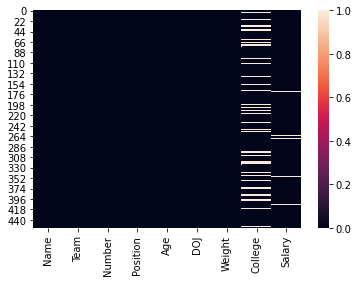

In [8]:
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
DOJ         0
Weight      0
College     0
Salary      0
dtype: int64

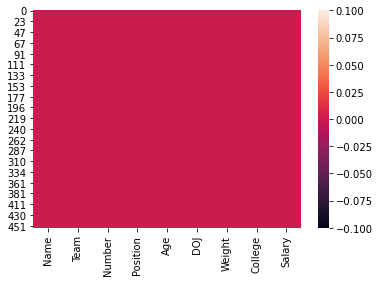

In [11]:
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

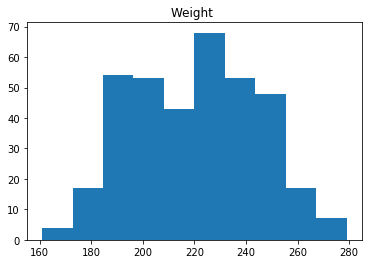

In [12]:
plt.hist(df["Weight"],bins=10)
plt.title("Weight ")
plt.show()

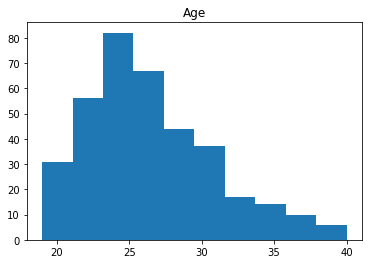

In [13]:
plt.hist(df["Age"],bins=10)
plt.title("Age")
plt.show()

In [14]:
df.corr()

,Number,Age,Weight,Salary
Number,1.000000,0.025090,0.239768,-0.154655
Age,0.025090,1.000000,0.058737,0.159385
Weight,0.239768,0.058737,1.000000,0.144334
Salary,-0.154655,0.159385,0.144334,1.000000


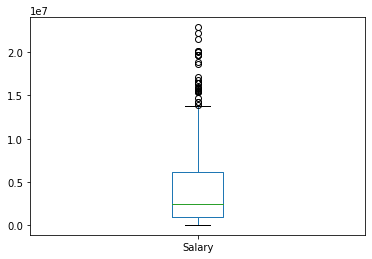

In [15]:
df["Salary"].plot.box()

Number       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Age       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Weight    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Salary       AxesSubplot(0.125,0.391471;0.227941x0.222059)
dtype: object

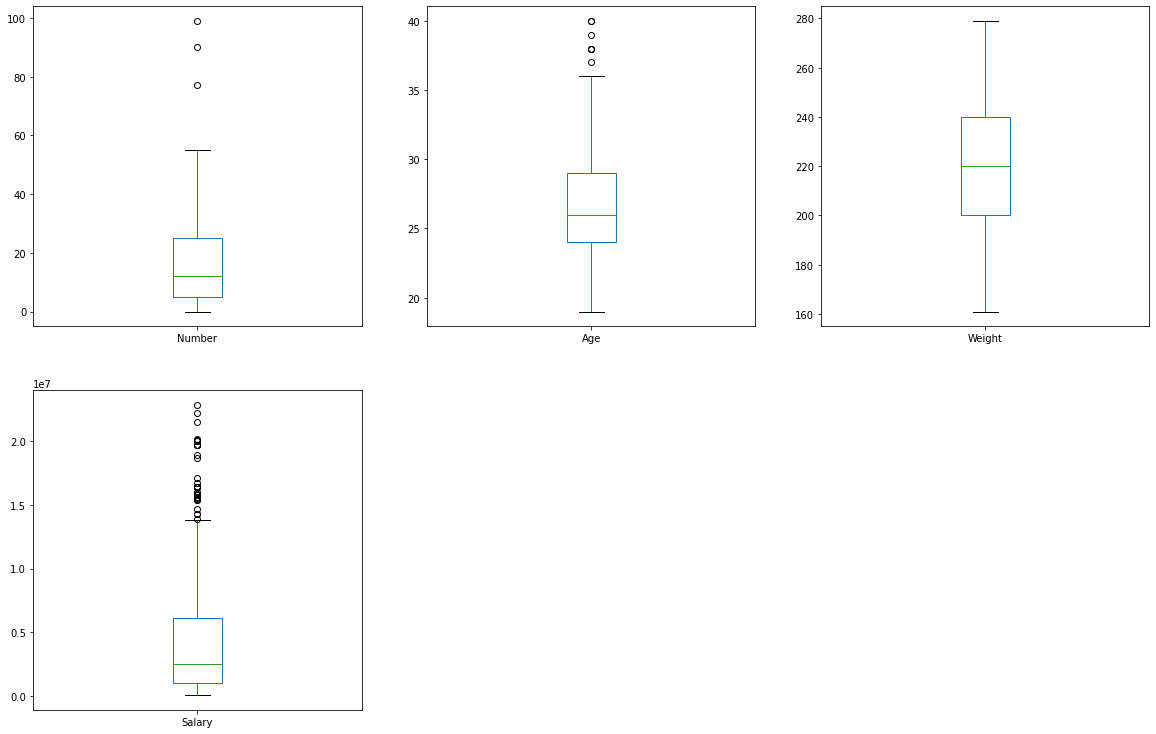

In [16]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(20,20))

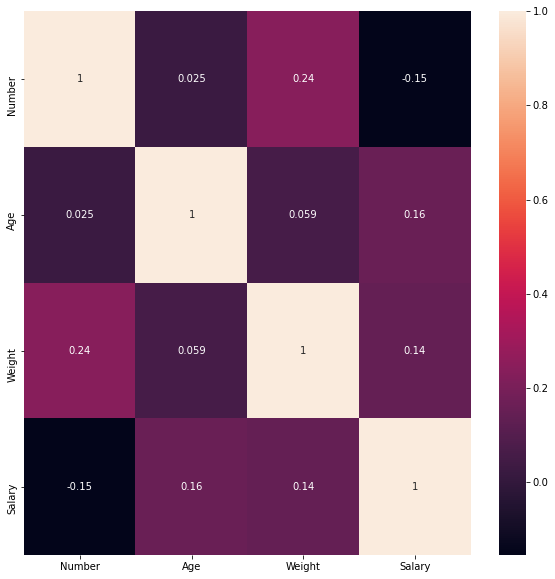

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
le=LabelEncoder()
list1=['Team','Position','College']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [19]:
df.shape

(364, 9)

In [20]:
df1=df.drop(["Name","DOJ"],axis=1)

In [21]:
df1

,Team,Number,Position,Age,Weight,College,Salary
0,1,0,2,25,180,90,7730337.0
1,1,99,3,25,235,50,6796117.0
3,1,28,4,22,185,31,1148640.0
6,1,55,1,21,235,44,1170960.0
7,1,41,0,25,238,33,2165160.0
...,...,...,...,...,...,...,...
449,28,5,4,23,206,24,1348440.0
451,28,23,3,26,206,22,981348.0
452,28,41,1,20,234,43,2239800.0
453,28,8,2,26,203,10,2433333.0


In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.57640645, 1.12395981, 0.13226798, ..., 1.60691803, 1.08718243,
        0.60829683],
       [1.57640645, 5.48769798, 0.59720998, ..., 0.61449469, 0.1758333 ,
        0.42557068],
       [1.57640645, 0.74600401, 1.32668794, ..., 1.40497142, 0.77576578,
        0.6790318 ],
       ...,
       [1.56681177, 1.6142015 , 0.86174594, ..., 0.57410537, 0.39686106,
        0.46560941],
       [1.56681177, 0.58968443, 0.13226798, ..., 0.67796362, 1.43884904,
        0.42775586],
       [1.56681177, 0.47886632, 1.5912239 , ..., 0.4529374 , 0.46001184,
        0.71841703]])

In [23]:
from scipy import stats
df2=df1[(z<3).all(axis=1)]

In [24]:
df2

,Team,Number,Position,Age,Weight,College,Salary
0,1,0,2,25,180,90,7730337.0
3,1,28,4,22,185,31,1148640.0
6,1,55,1,21,235,44,1170960.0
7,1,41,0,25,238,33,2165160.0
8,1,12,2,22,190,49,1824360.0
...,...,...,...,...,...,...,...
449,28,5,4,23,206,24,1348440.0
451,28,23,3,26,206,22,981348.0
452,28,41,1,20,234,43,2239800.0
453,28,8,2,26,203,10,2433333.0


In [25]:
df2.shape

(353, 7)

Team           AxesSubplot(0.125,0.657941;0.227941x0.222059)
Number      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Position    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Age            AxesSubplot(0.125,0.391471;0.227941x0.222059)
Weight      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
College     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Salary            AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

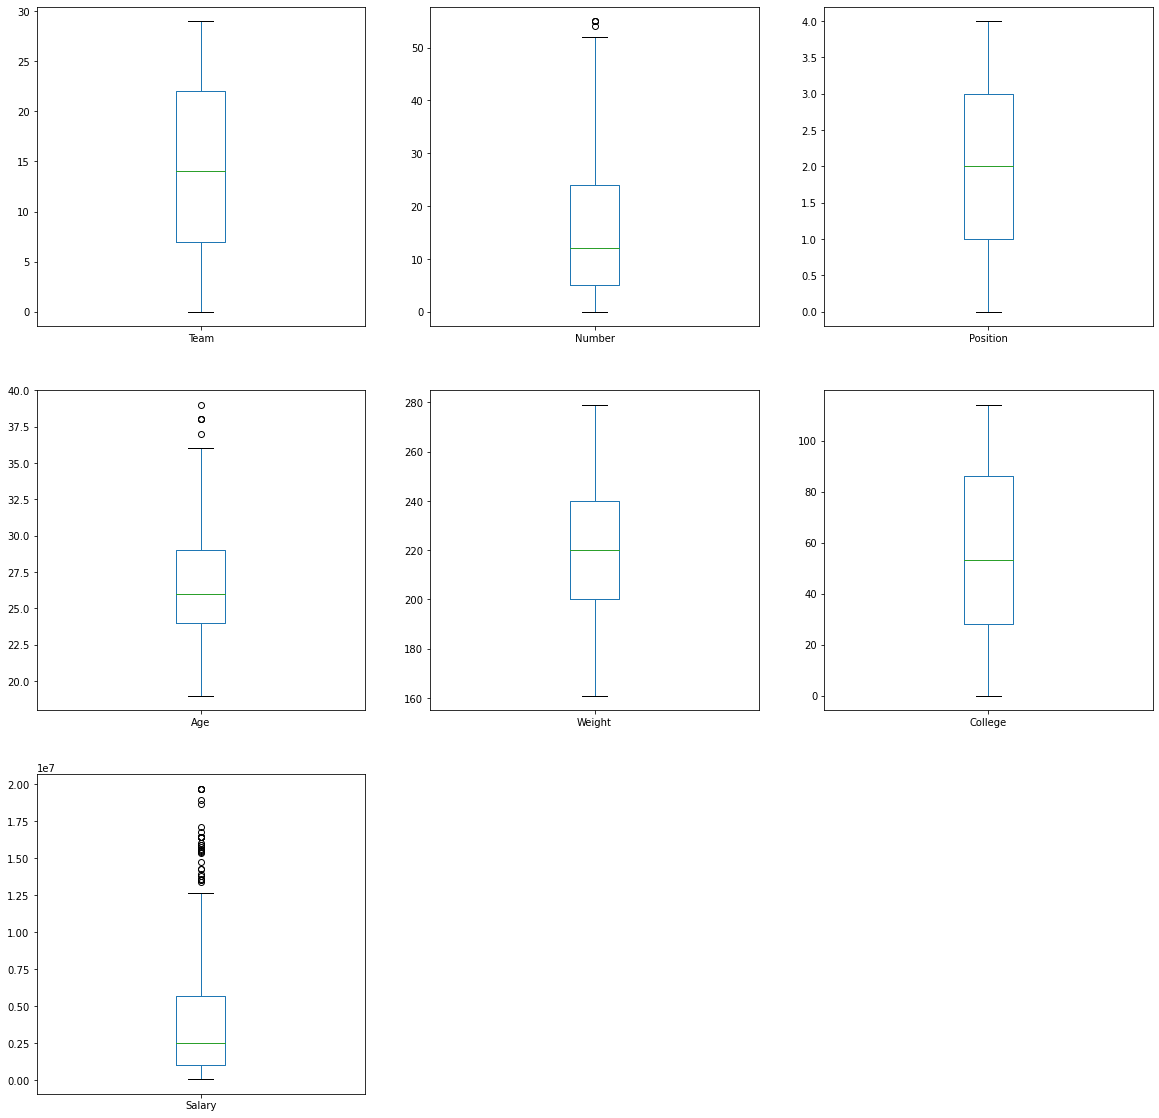

In [26]:
df2.plot(kind='box',subplots=True,layout=(3,3),figsize=(20,20))

In [27]:

x1=df2.iloc[:,0:7]


In [28]:
y=df2.iloc[:,-1]

In [29]:
x1.shape

(353, 7)

In [30]:
y.shape

(353,)

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,train_df,train_target):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(train_df,train_target,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",i,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors, cv=10)
gknr.fit(x1,y)
gknr.best_params_

{'n_neighbors': 1}

In [33]:
knr=KNeighborsRegressor(n_neighbors=1)
i=maxr2_score(knr,x1,y)

r2 score corresponding to 42 is 0.9997734908292029
r2 score corresponding to 43 is 0.9994633160174902
r2 score corresponding to 44 is 0.9997551057283437
r2 score corresponding to 45 is 0.9997255759782763
r2 score corresponding to 46 is 0.9999461040367971
r2 score corresponding to 47 is 0.9997032618153462
r2 score corresponding to 48 is 0.9999226370331561
r2 score corresponding to 49 is 0.999887748486175
r2 score corresponding to 50 is 0.9994887235164247
r2 score corresponding to 51 is 0.9998739495460691
r2 score corresponding to 52 is 0.9999257288931596
r2 score corresponding to 53 is 0.9995532564536798
r2 score corresponding to 54 is 0.9999374396910146
r2 score corresponding to 55 is 0.9999185488415814
r2 score corresponding to 56 is 0.9999428034531477
r2 score corresponding to 57 is 0.9999506437567603
r2 score corresponding to 58 is 0.9997919084471332
r2 score corresponding to 59 is 0.9989231912794075
r2 score corresponding to 60 is 0.9995783611902441
r2 score corresponding to 61 is 

In [34]:
from sklearn.model_selection import cross_val_score

print("Mean r2 score for KNN Regression:",cross_val_score(knr,x1,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression",cross_val_score(knr,x1,y,cv=5,scoring="r2").std())

Mean r2 score for KNN Regression: 0.9998306271358981
standard deviation in r2 score for KNN Regression 6.66213760250364e-05


In [35]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parametors,cv=10)
clf.fit(x1,y)
clf.best_params_

{'alpha': 0.001}

In [36]:
lsreg=Lasso(alpha=0.001)
i=maxr2_score(lsreg,x1,y)

r2 score corresponding to 42 is 1.0
r2 score corresponding to 43 is 1.0
r2 score corresponding to 44 is 1.0
r2 score corresponding to 45 is 1.0
r2 score corresponding to 46 is 1.0
r2 score corresponding to 47 is 1.0
r2 score corresponding to 48 is 1.0
r2 score corresponding to 49 is 1.0
r2 score corresponding to 50 is 1.0
r2 score corresponding to 51 is 1.0
r2 score corresponding to 52 is 1.0
r2 score corresponding to 53 is 1.0
r2 score corresponding to 54 is 1.0
r2 score corresponding to 55 is 1.0
r2 score corresponding to 56 is 1.0
r2 score corresponding to 57 is 1.0
r2 score corresponding to 58 is 1.0
r2 score corresponding to 59 is 1.0
r2 score corresponding to 60 is 1.0
r2 score corresponding to 61 is 1.0
r2 score corresponding to 62 is 1.0
r2 score corresponding to 63 is 1.0
r2 score corresponding to 64 is 1.0
r2 score corresponding to 65 is 1.0
r2 score corresponding to 66 is 1.0
r2 score corresponding to 67 is 1.0
r2 score corresponding to 68 is 1.0
r2 score corresponding to 69

In [37]:
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x1,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x1,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression: 1.0
standard deviation in r2 score for Lasso Regression 0.0


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x1,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [39]:
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=1000)
print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x1,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x1,y,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression: 0.8569534744873885
standard deviation in r2 score for gradient boosting Regression 0.001904317070929704


In [40]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parametors={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lsreg,DecisionTreeRegressor()]}
clg=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x1,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [41]:
ada_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.01,n_estimators=1000)
print("Mean r2 score for ada boosting regression:",cross_val_score(ada_reg,x1,y,cv=5,scoring="r2").mean())
print("standard deviation in r2score for ada boosting regression",cross_val_score(ada_reg,x1,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting regression: 1.0
standard deviation in r2score for ada boosting regression 0.0


In [42]:
r_state=maxr2_score(ada_reg,x1,y)

r2 score corresponding to 42 is 1.0
r2 score corresponding to 43 is 1.0
r2 score corresponding to 44 is 1.0
r2 score corresponding to 45 is 1.0
r2 score corresponding to 46 is 1.0
r2 score corresponding to 47 is 1.0
r2 score corresponding to 48 is 1.0
r2 score corresponding to 49 is 1.0
r2 score corresponding to 50 is 1.0
r2 score corresponding to 51 is 1.0
r2 score corresponding to 52 is 1.0
r2 score corresponding to 53 is 1.0
r2 score corresponding to 54 is 1.0
r2 score corresponding to 55 is 1.0
r2 score corresponding to 56 is 1.0
r2 score corresponding to 57 is 1.0
r2 score corresponding to 58 is 1.0
r2 score corresponding to 59 is 1.0
r2 score corresponding to 60 is 1.0
r2 score corresponding to 61 is 1.0
r2 score corresponding to 62 is 1.0
r2 score corresponding to 63 is 1.0
r2 score corresponding to 64 is 1.0
r2 score corresponding to 65 is 1.0
r2 score corresponding to 66 is 1.0
r2 score corresponding to 67 is 1.0
r2 score corresponding to 68 is 1.0
r2 score corresponding to 69

In [43]:
# we tried all and found Add booster best one
# getting score of 100%
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)
ada_reg=AdaBoostRegressor()
ada_reg.fit(x1,y)
y_pred=ada_reg.predict(x_test)

In [44]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  314392.07695023634
r2_score is: 0.9957628924123612


In [46]:
import joblib
joblib.dump(ada_reg,"mnc_salary.pkl")

['mnc_salary.pkl']